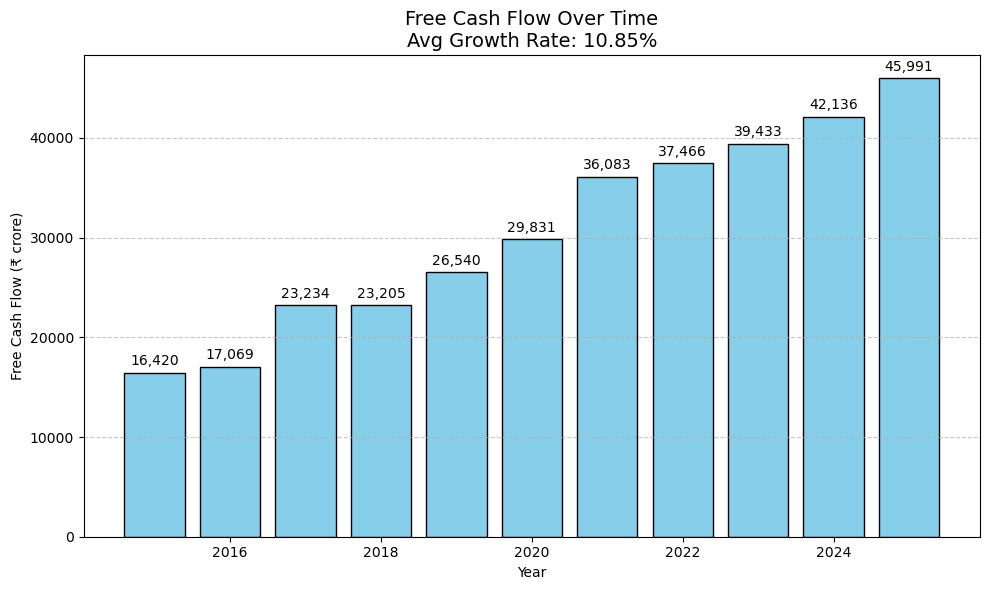

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fcf_growth(fcf_data):
    """
    Plots Free Cash Flow over years and calculates average growth rate.
    
    Parameters:
    fcf_data (dict): Dictionary with year as key and FCF as value
    """
    # Sort data by year
    years = sorted(fcf_data.keys())
    fcfs = [fcf_data[year] for year in years]

    # Calculate average growth rate (CAGR-style)
    start, end = fcfs[0], fcfs[-1]
    n_years = len(fcfs) - 1
    if start > 0 and n_years > 0:
        avg_growth_rate = ((end / start) ** (1 / n_years) - 1) * 100
    else:
        avg_growth_rate = 0

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(years, fcfs, color='skyblue', edgecolor='black')
    plt.title(f"Free Cash Flow Over Time\nAvg Growth Rate: {avg_growth_rate:.2f}%", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("Free Cash Flow (₹ crore)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + max(fcfs)*0.01, f"{yval:,.0f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# 🔢 Example usage
fcf_data = {
    2015:16419.58,
    2016:17068.92,
    2017:23234,
    2018:23205,
    2019:26540,
    2020:29831,
    2021:36083,
    2022:37466,
    2023:39433,
    2024:42136,
    2025:45991   # Your latest value
}

plot_fcf_growth(fcf_data)

In [2]:
def project_fcf(current_fcf, growth_rate_percent, years):
    """
    Projects Free Cash Flow over a given number of years using compound growth.

    Parameters:
    - current_fcf (float): Free Cash Flow for the current year
    - growth_rate_percent (float): Annual growth rate in percent (e.g., 10 for 10%)
    - years (int): Number of years to project

    Returns:
    - List of projected FCFs for each year
    """
    growth_rate = growth_rate_percent / 100
    projected_fcfs = []

    for year in range(1, years + 1):
        fcf = current_fcf * ((1 + growth_rate) ** year)
        projected_fcfs.append(round(fcf, 2))

    return projected_fcfs

# Example usage:
if __name__ == "__main__":
    current_fcf = float(input("Enter current year's Free Cash Flow (in crores): "))
    growth_rate = float(input("Enter expected annual growth rate (%): "))
    years = int(input("Enter number of years to project: "))

    projections = project_fcf(current_fcf, growth_rate, years)

    print("\n📈 Projected Free Cash Flows:")
    for i, fcf in enumerate(projections, start=1):
        print(f"Year {i}: ₹{fcf} crore")
    for i, fcf in enumerate(projections, start=1):
        print(f"{fcf}")


📈 Projected Free Cash Flows:
Year 1: ₹138.84 crore
Year 2: ₹247.14 crore
Year 3: ₹439.9 crore
Year 4: ₹783.02 crore
Year 5: ₹1393.78 crore
Year 6: ₹2480.93 crore
Year 7: ₹4416.06 crore
Year 8: ₹7860.58 crore
Year 9: ₹13991.83 crore
Year 10: ₹24905.46 crore
Year 11: ₹44331.72 crore
Year 12: ₹78910.47 crore
Year 13: ₹140460.64 crore
Year 14: ₹250019.93 crore
Year 15: ₹445035.48 crore
Year 16: ₹792163.16 crore
Year 17: ₹1410050.42 crore
Year 18: ₹2509889.75 crore
Year 19: ₹4467603.75 crore
Year 20: ₹7952334.67 crore
Year 21: ₹14155155.71 crore
Year 22: ₹25196177.17 crore
Year 23: ₹44849195.36 crore
Year 24: ₹79831567.75 crore
Year 25: ₹142100190.59 crore
Year 26: ₹252938339.25 crore
Year 27: ₹450230243.86 crore
Year 28: ₹801409834.07 crore
Year 29: ₹1426509504.64 crore
Year 30: ₹2539186918.26 crore
Year 31: ₹4519752714.5 crore
Year 32: ₹8045159831.82 crore
Year 33: ₹14320384500.63 crore
Year 34: ₹25490284411.13 crore
Year 35: ₹45372706251.81 crore
Year 36: ₹80763417128.22 crore
Year 37: 

In [3]:
def calculate_dcf(cash_flows, discount_rate, terminal_growth_rate=None):
    """
    Calculate Discounted Cash Flow (DCF) value.

    Parameters:
    -----------
    cash_flows : list
        List of projected future cash flows (year 1, year 2, ...).
    discount_rate : float
        Discount rate (in decimal, e.g., 0.1 for 10%).
    terminal_growth_rate : float, optional
        Growth rate for terminal value (in decimal). If None, terminal value is ignored.

    Returns:
    --------
    float
        The DCF value (Present Value of all cash flows).
    """
    dcf_value = 0.0
    n = len(cash_flows)

    # Discount each cash flow
    for t, cf in enumerate(cash_flows, start=1):
        dcf_value += cf / ((1 + discount_rate) ** t)

    # Add terminal value if growth rate is given
    if terminal_growth_rate is not None:
        terminal_value = cash_flows[-1] * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)
        dcf_value += terminal_value / ((1 + discount_rate) ** n)
        print(f"terminal value : ",round(terminal_value,2))
    return dcf_value


# Example Usage:
projected_cash_flows = [49670.28
                        ,53643.9
                        ,57935.41
                        ,62570.25
                        ,67575.87
                        ,72981.94
                        ,78820.49
                        ,85126.13
                        ,91936.22
                        ,99291.12]  # e.g., 10 years of FCFF
discount_rate = 0.10  # 10%
terminal_growth = 0.03  # 3%

dcf_value = calculate_dcf(projected_cash_flows, discount_rate, terminal_growth)
print(f"DCF Valuation: {dcf_value:.2f}")


terminal value :  1460997.91
DCF Valuation: 979616.60


In [4]:
import yfinance as yf

def get_exit_multiple(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info

    # Extract required values
    market_cap = info.get('marketCap')
    total_debt = info.get('totalDebt')
    cash = info.get('totalCash')
    ebitda = info.get('ebitda')

    # Validate inputs
    if None in [market_cap, total_debt, cash, ebitda] or ebitda == 0:
        print("⚠️ Missing or invalid data for calculation.")
        return None

    # Calculate Enterprise Value
    enterprise_value = market_cap + total_debt - cash

    # Calculate Exit Multiple
    exit_multiple = enterprise_value / ebitda
    print(f"📊 Real-Time EV/EBITDA for {ticker}: {exit_multiple:.2f}")
    return exit_multiple

# Example usage
get_exit_multiple("INFY.NS")  # Infosys (India NSE)

📊 Real-Time EV/EBITDA for INFY.NS: 1401.94


1401.9382351658296